In [55]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
os.environ['KMP_DUPLICATE_OK'] = 'True'

In [14]:
tf.__version__

'2.10.0'

W = [10.221252]
b = [1.3376045]
    0 |     8.1343 |     0.7636 |  990.162598
  100 |     1.3172 |    -0.7843 |   0.112716
  200 |     1.2548 |    -0.5590 |   0.057256
  300 |     1.2103 |    -0.3984 |   0.029084
  400 |     1.1786 |    -0.2839 |   0.014774
  500 |     1.1561 |    -0.2024 |   0.007505
  600 |     1.1399 |    -0.1442 |   0.003812
  700 |     1.1285 |    -0.1028 |   0.001936
  800 |     1.1203 |    -0.0733 |   0.000984
  900 |     1.1145 |    -0.0522 |   0.000500
 1000 |     1.1103 |    -0.0372 |   0.000254
 1100 |     1.1073 |    -0.0265 |   0.000129
 1200 |     1.1052 |    -0.0189 |   0.000065
 1300 |     1.1037 |    -0.0135 |   0.000033
 1400 |     1.1027 |    -0.0096 |   0.000017
 1500 |     1.1019 |    -0.0068 |   0.000009
 1600 |     1.1014 |    -0.0049 |   0.000004
 1700 |     1.1010 |    -0.0035 |   0.000002
 1800 |     1.1007 |    -0.0025 |   0.000001
 1900 |     1.1005 |    -0.0018 |   0.000001
 2000 |     1.1003 |    -0.0013 |   0.000000


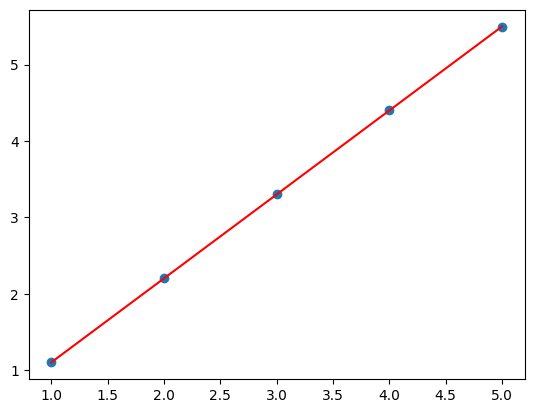

In [60]:
#Problem 1 

tf.random.set_seed(0)

x_data = [1, 2, 3, 4, 5]
y_data = [1.1, 2.2, 3.3, 4.4, 5.5]

W = tf.Variable(tf.random.normal((1,),-20., 20)) 
print('W =', W.numpy())
b = tf.Variable(tf.random.normal((1,),-20., 20)) 
print('b =', b.numpy())
learning_rate = 0.01

def predict(x,w):
    return ((x*W) + b)

for i in range(2100):
    with tf.GradientTape() as tape: 
        hypothesis = W * x_data + b
        cost = tf.reduce_mean(tf.square(hypothesis - y_data))
        
    W_grad, b_grad = tape.gradient(cost, [W, b]) 
    W.assign_sub(learning_rate * W_grad)     
    b.assign_sub(learning_rate * b_grad)   
    if i % 100 == 0: 
        print("{:5} | {:10.4f} | {:10.4f} | {: 10.6f}".format(i, W.numpy()[0], b.numpy()[0], cost)) 
        


plt.plot(x_data, y_data, 'o')
plt.plot(x_data, hypothesis, 'r-')


In [61]:
#problem 2
x = [6.0]
#print(W.shape)
print(predict(x,W))

x= [4.5]
print(predict(x,W))

x= [1.5,5.5,7.5]
print(predict(x,W))

x= [1,2,3,4,5]
print(predict(x,W))
print("accuracy", ((predict(x,W)/y_data)*100).numpy())


tf.Tensor([6.600597], shape=(1,), dtype=float32)
tf.Tensor([4.9502225], shape=(1,), dtype=float32)
tf.Tensor([1.6494735 6.0504723 8.250971 ], shape=(3,), dtype=float32)
tf.Tensor([1.0993488 2.1995983 3.2998478 4.400098  5.5003476], shape=(5,), dtype=float32)
accuracy [ 99.940796  99.981735  99.99539  100.00222  100.00632 ]


In [63]:
tf.random.set_seed(0)

x_data = [1, 2, 3, 4, 5]
y_data = [1.1, 2.2, 3.3, 4.4, 5.5]

W = tf.Variable(tf.random.normal((1,),-20., 20)) 
print('W =', W.numpy())
b = tf.Variable(tf.random.normal((1,),-20., 20)) 
print('b =', b.numpy())
learning_rate = 0.01
optimizer = tf.keras.optimizers.SGD(learning_rate) 


def predict(x,w):
    return ((x*W) + b)

for i in range(5100):
    with tf.GradientTape() as tape: 
        hypothesis = W * x_data + b
        cost = tf.reduce_mean(tf.square(hypothesis - Y))
        
    grad = tape.gradient(cost, [W,b]) 
    optimizer.apply_gradients(zip(grad, [W,b]))
    
    if i % 100 == 0: 
        print("{:5} | {:10.4f} | {:10.4f} | {: 10.6f}".format(i, W.numpy()[0], b.numpy()[0], cost)) 
        


#plt.plot(x_data, y_data, 'o')
#plt.plot(x_data, hypothesis, 'r-')

W = [10.221252]
b = [1.3376045]
    0 |    12.8323 |     2.3442 |  2796.811279
  100 |    15.3173 |    27.0330 |  614.970398
  200 |    10.9169 |    42.9198 |  339.228058
  300 |     7.7807 |    54.2426 |  199.159912
  400 |     5.5454 |    62.3125 |  128.009796
  500 |     3.9523 |    68.0641 |  91.868050
  600 |     2.8169 |    72.1634 |  73.509033
  700 |     2.0076 |    75.0851 |  64.183182
  800 |     1.4309 |    77.1674 |  59.446129
  900 |     1.0198 |    78.6514 |  57.039806
 1000 |     0.7268 |    79.7092 |  55.817459
 1100 |     0.5180 |    80.4630 |  55.196575
 1200 |     0.3692 |    81.0003 |  54.881176
 1300 |     0.2631 |    81.3833 |  54.720959
 1400 |     0.1876 |    81.6562 |  54.639584
 1500 |     0.1337 |    81.8507 |  54.598240
 1600 |     0.0953 |    81.9894 |  54.577236
 1700 |     0.0679 |    82.0882 |  54.566570
 1800 |     0.0484 |    82.1586 |  54.561150
 1900 |     0.0345 |    82.2088 |  54.558399
 2000 |     0.0246 |    82.2446 |  54.556999
 2100 |     0.017

In [64]:
#problem 2
x = [6.0]
#print(W.shape)
print(predict(x,W))

x= [4.5]
print(predict(x,W))

x= [1.5,5.5,7.5]
print(predict(x,W))


x= [1,2,3,4,5]
print(predict(x,W))
print("accuracy", ((predict(x,W)/y_data)*100).numpy())


tf.Tensor([82.334], shape=(1,), dtype=float32)
tf.Tensor([82.33357], shape=(1,), dtype=float32)
tf.Tensor([82.33272  82.333855 82.33443 ], shape=(3,), dtype=float32)
tf.Tensor([82.33257  82.33286  82.333145 82.33343  82.33371 ], shape=(5,), dtype=float32)
accuracy [7484.7793 3742.4026 2494.9438 1871.2144 1496.9766]


In [65]:
tf.random.set_seed(0)
        #x1 x2 x3 x4 x5 y
data = np.array( 
        [[75,88,72,87,73,87],
        [65,75,85,68,83,76],
        [98,85,95,90,89,90],
        [57,67,78,85,79,87],
        [87,78,84,79,82,85],
        [74,85,65,59,61,69]],dtype=np.float32)

X = data[:, :-1]
Y = data[:, [-1]]


W = tf.Variable(tf.random.normal((5,1),-20., 20)) 
print('W =', W.numpy())
b = tf.Variable(tf.random.normal((1,),-20., 20)) 
print('b =', b.numpy())
learning_rate = 0.00001
optimizer = tf.keras.optimizers.SGD(learning_rate) 


def predict(X):
    return tf.matmul(X, W) + b 


for i in range(2100):
    with tf.GradientTape() as tape: 
        hypothesis =tf.matmul(X,W) + b
        cost = tf.reduce_mean(tf.square(hypothesis - Y))
        
    W_grad, b_grad = tape.gradient(cost, [W, b]) 
    W.assign_sub(learning_rate * W_grad)     
    b.assign_sub(learning_rate * b_grad)
    
    if i % 100 == 0: 
        print("{:5} | {: 10.6f}".format(i, cost)) 
        


#plt.plot(X, Y, 'o')
#plt.plot(X, predict(X), 'r-')

W = [[ 10.221252]
 [-11.541559]
 [-28.393898]
 [-40.720745]
 [-44.736557]]
b = [1.3376045]
    0 |  84579544.000000
  100 |  158183.140625
  200 |  88601.437500
  300 |  50169.761719
  400 |  28818.986328
  500 |  16863.636719
  600 |  10098.305664
  700 |  6216.644531
  800 |  3949.816650
  900 |  2596.759277
 1000 |  1767.865845
 1100 |  1244.905884
 1200 |  904.375916
 1300 |  675.423401
 1400 |  516.701843
 1500 |  403.568359
 1600 |  320.965240
 1700 |  259.428680
 1800 |  212.831253
 1900 |  177.080566
 2000 |  149.364044


In [66]:
X.shape

(6, 5)

In [67]:
b.numpy()

array([1.7499673], dtype=float32)

In [68]:
tf.matmul(X,W)+b

<tf.Tensor: shape=(6, 1), dtype=float32, numpy=
array([[ 79.97952 ],
       [ 65.99332 ],
       [113.81256 ],
       [ 83.01843 ],
       [ 82.3006  ],
       [ 63.845577]], dtype=float32)>

In [69]:
Y

array([[87.],
       [76.],
       [90.],
       [87.],
       [85.],
       [69.]], dtype=float32)

In [70]:
X=np.array([[80,80,95,92,79]],dtype=np.float32)

print(predict(X).numpy())
print("accuracy", ((predict(X)/Y)*100).numpy())

[[169.21179]]
accuracy [[194.4963]
 [222.6471]
 [188.0131]
 [194.4963]
 [199.0727]
 [245.2345]]


In [71]:
X=np.array([[75, 85, 95, 77, 87]] ,dtype=np.float32)

print(predict(X).numpy())
print("accuracy", ((predict(X)/Y)*100).numpy())

[[103.56848]]
accuracy [[119.044235]
 [136.2743  ]
 [115.07609 ]
 [119.044235]
 [121.84527 ]
 [150.09926 ]]


In [72]:
X=np.array([[70, 70, 90, 85, 85], [85, 95, 88, 84, 91]] ,dtype=np.float32)

predict(X).numpy()
#print("accuracy", ((predict(X)/Y)*100).numpy())

array([[108.267426],
       [ 57.764034]], dtype=float32)

In [73]:
tf.random.set_seed(0)
        #x1 x2 x3 x4 x5 y
data = np.array( 
        [[75,88,72,87,73,87],
        [65,75,85,68,83,76],
        [98,85,95,90,89,90],
        [57,67,78,85,79,87],
        [87,78,84,79,82,85],
        [74,85,65,59,61,69]],dtype=np.float32)

X = data[:, :-1]
Y = data[:, [-1]]


W = tf.Variable(tf.random.normal((5,1),-20., 20)) 
print('W =', W.numpy())
b = tf.Variable(tf.random.normal((1,),-20., 20)) 
print('b =', b.numpy())
learning_rate = 2
optimizer = tf.keras.optimizers.Adam(learning_rate) 


def predict(X):
    return tf.matmul(X, W) + b 


for i in range(5100):
    with tf.GradientTape() as tape:
        cost = tf.reduce_mean(tf.square(predict(X) - Y)) 
        
    grads = tape.gradient(cost, [W])
    optimizer.apply_gradients(grads_and_vars = zip(grads,[W]))
    
    if i % 100 == 0: 
        print("{:5} | {: 10.6f}".format(i, cost)) 

W = [[ 10.221252]
 [-11.541559]
 [-28.393898]
 [-40.720745]
 [-44.736557]]
b = [1.3376045]
    0 |  84579544.000000
  100 |  229296.859375
  200 |  143048.890625
  300 |  77548.968750
  400 |  37302.382812
  500 |  16381.784180
  600 |  6835.895996
  700 |  2866.909424
  800 |  1281.776978
  900 |  629.663391
 1000 |  336.770660
 1100 |  192.373535
 1200 |  117.242424
 1300 |  77.625313
 1400 |  56.905487
 1500 |  46.219570
 1600 |  40.759033
 1700 |  37.950840
 1800 |  36.447124
 1900 |  35.560062
 2000 |  34.948078
 2100 |  34.448048
 2200 |  33.984161
 2300 |  33.523781
 2400 |  33.052700
 2500 |  32.565826
 2600 |  32.061375
 2700 |  31.537918
 2800 |  30.995964
 2900 |  30.435259
 3000 |  29.856268
 3100 |  29.258768
 3200 |  28.643328
 3300 |  28.010080
 3400 |  27.359922
 3500 |  26.692976
 3600 |  26.010157
 3700 |  25.312042
 3800 |  24.599457
 3900 |  23.873924
 4000 |  23.135714
 4100 |  22.386520
 4200 |  21.627655
 4300 |  20.860380
 4400 |  20.086605
 4500 |  19.307783
 4

In [74]:
X=np.array([[80,80,95,92,79]],dtype=np.float32)

print(predict(X).numpy())

print("accuracy", ((predict(X)/Y)*100).numpy())

[[127.30972]]
accuracy [[146.33301]
 [167.5128 ]
 [141.45525]
 [146.33301]
 [149.77615]
 [184.50685]]


In [75]:
X=np.array([[75, 85, 95, 77, 87]] ,dtype=np.float32)

print(predict(X).numpy())
print("accuracy", ((predict(X)/Y)*100).numpy())

[[98.88475]]
accuracy [[113.66064]
 [130.11151]
 [109.87195]
 [113.66064]
 [116.335  ]
 [143.31123]]


In [76]:
X=np.array([[70, 70, 90, 85, 85], [85, 95, 88, 84, 91]] ,dtype=np.float32)

predict(X).numpy()
#print("accuracy", ((predict(X)/Y)*100).numpy())

array([[96.409744],
       [78.850464]], dtype=float32)